## Лабораторна робота №2: "Імплементація алгоритмів стиснення"

Склад команди та розподіл виконаних завдань:

- Тепляков Захарій: Алгоритм Гаффмана, алгоритм LZW
- Лисик Лев-Федір: Алгоритм LZ77, алгоритм Deflate

Для кожного з алгоритмів поданих нижче
- опишіть як працює алгоритм
- напишіть класи з методами encode та decode
- перевірте правильність кодування та декодування
- дослідіть час виконання коду в залежності від розмірів вхідних даних
- оцініть ступінь стиснення(у відсотка) в залежності від розмірів
- напишіть висновок про ефективність різних алгоритмів та умови за яких той чи інший алгоритм дають кращий результат

In [70]:
from random import randint
import time
import matplotlib.pyplot as plt

# Алгоритм Гаффмана

## Node

Клас **Node** реалізований наступним чином: об'єкт цього класу має атрибути weight та chars, де weight - загальна вага, chars - список списків, де кожен список - символ та відповідний йому код. Також реалізований метод порівняння, де об'єкти класу Node порівнюються за вагою; Реалізоване додавання: поєднується вага та список символів. Також для реалізації закодовування було імплементовано \_\_iter\_\_ для ітерації по об'єкту.

## Huffman

### count_frequency

Метод **count_frequency** створений для того, аби підрахувати кількість повторень кожного символа в строці. Метод повертає словник, де ключі - символи тексту, значення - кількість їх повторень у строці.

### encode

Метод **encode** приймає на вхід строку, після чого перевіряє, чи вона не є пустою - у інакшому випадку повертає пусту строку та словник. Якщо ж строка не пуста, то викливається метод **count_frequency**. 

Створюється список вузлів, де в якості ваги передаються значення словника **frequency**, а в якості списку символів подається лише один символ - ключі словника **frequency**.

Після цього алгоритм перевіряє, чи довжина списку вузлів не дорівнює одиниці (коли вхідна строка складається лише з однакових символів) - в такому випадку алгоритм повертає строку у вигляді '0'*довжина тексту, та {char: '0'}.

У разі, якщо довжина списку вузлів більше одиниці, алгоритм продовжує свою роботу.
Допоки список вузлів має більше ніж один вузол, алгоритм виконує наступні дії:

1. Алгоритм відбирає два вузла з найменшими вагами, та для одного вузла додає на початок коду символів '1' (додається на початок строки через те, що алгоритм будує дерево від його листків), а для іншого вузла для кожного коду символу додає '0' на початок. 

2. За допомогою методу \_\_add\_\_ алгоритм з'єднує ці два вузли: поєднуються список символів першого і другого вузла, також сумується загальна вага.

3. Як тільки довжина списку вузлів дорівнює одиниці, алгоритм створює словник **huffman_code**, де ключами є символи вхідного тексту, а значеннями - відповідний їм код за алгоритмом Гаффмана. Після цього створюється **encoded_text**, де кожен символ вхідного тексту заміняється на відповідний йому код. Метод повертає закодований текст та словник символів та відповідних їм кодів: **encoded_text**, **huffman_code**.

### decode

Метод **decode** приймає закодований текст та словник, де містяться символи та відповідний їм код. Після чого для зручної праці з словником ключі та значення міняються місцями. Після чого створюються пусті строки **decoded_text** та **temp**. Алгоритм починає проходитись по кожному символі в коді, та додає цей символ до temp. Допоки temp не буде дорівнювати якомусь символу в словнику **coding_dict**, алгоритм буде додавати символі з коду далі. Так як коди Гаффмана мають властивість префіксності, як тільки знайдеться перша відповідність **temp** з кодом символу зі словника **coding_dict**, цей символ додається у **decoded_text** та **temp** знов перетворюється на пусту строку. Так алгоритм продовжує, доки не буде розкодований весь текст, після чого він його повертає - **decoded_text**.

Ratio of encoded text to original text: 0.6751125


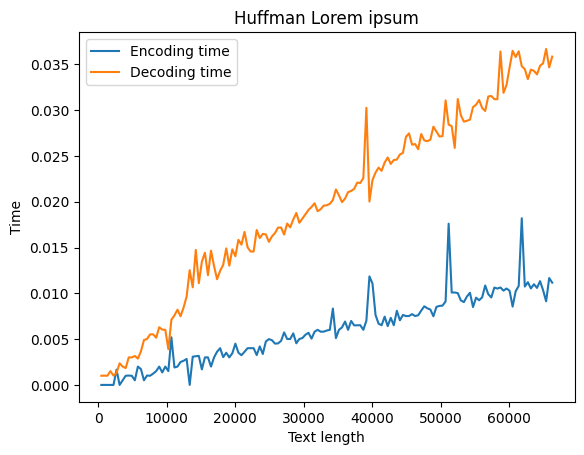

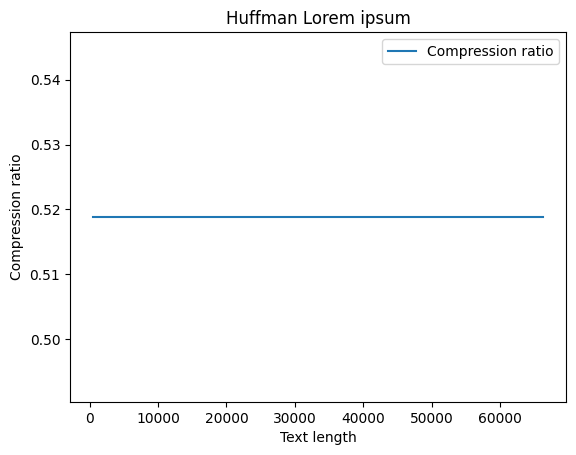

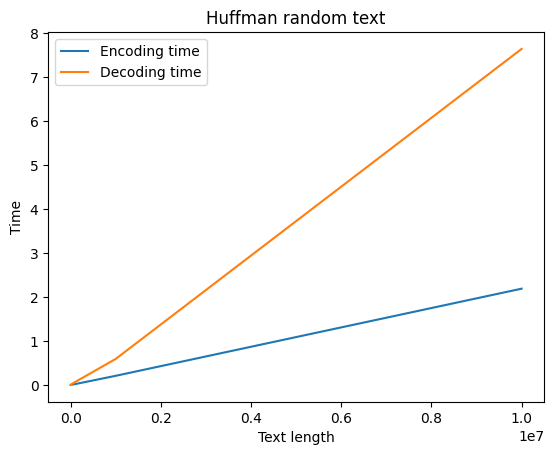

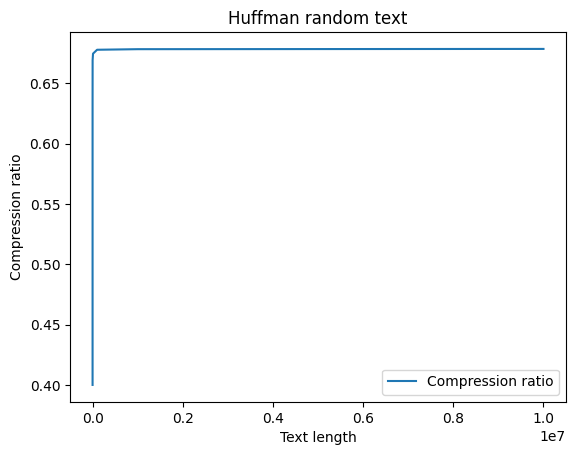

In [12]:
class Node:
    def __init__(self, weight: int, chars: list[list[str]]):
        self.weight = weight
        self.chars = chars

    def __lt__(self, other):
        return self.weight < other.weight
    
    def __add__(self, other):
        return Node(self.weight + other.weight, self.chars + other.chars)
    
    def __iter__(self):
        return iter(self.chars)

class Huffman:
    @staticmethod
    def count_frequency(text: str) -> dict[str, int]:
        frequency = {}

        for char in text:
            frequency.setdefault(char, 0)
            frequency[char] += 1

        return frequency


    def encode(self, text: str) -> tuple[str, dict[str, str]]:
        if not text:
            return '', {}

        frequency = self.count_frequency(text)

        tree = [Node(weight, [[char,'']]) for char, weight in frequency.items()]

        if len(tree) == 1:
            return '0'*frequency[text[0]], {text[0]: '0'}

        while len(tree) > 1:
            first_min=tree.pop(tree.index(min(tree)))
            second_min=tree.pop(tree.index(min(tree)))
            for char in first_min:
                char[1] = '1' + char[1]
            for char in second_min:
                char[1] = '0' + char[1]
            tree.append(first_min+second_min)

        huffman_code = {item[0]: item[1] for item in tree[0]}

        encoded_text = ''.join(huffman_code[char] for char in text)

        return encoded_text, huffman_code


    def decode(self, code: str, coding_dict: dict[str, str]) -> str:
        reverse=dict((v,k) for k,v in coding_dict.items())

        decoded_text = ""
        temp = ""

        for char in code:
            temp += char
            if temp in reverse:
                decoded_text += reverse[temp]
                temp = ""

        return decoded_text
    

if __name__ == "__main__":
    huffman = Huffman()
    alphabet = "abcdefghigklmnopqrstuvwxyz., '1234567890()"

    text = "".join(alphabet[randint(0, len(alphabet) - 1)] for _ in range(10000))
    encoded_text, coding_dict = huffman.encode(text)
    assert huffman.decode(encoded_text, coding_dict) == text

    print(f'Ratio of encoded text to original text: {len(encoded_text) / (len(text) * 8)}')

    text_size = [i for i in range(1, 150)]
    encoding_time_results = []
    decoding_time_results = []
    compression_results = []
    start_text="Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."
    len_texts = []

    for size in text_size:
        text = size*start_text
        len_texts.append(len(text))
        start = time.time()
        encoded_text, coding_dict = huffman.encode(text)
        encoding_time_results.append(time.time() - start)
        start = time.time()
        decoded_text = huffman.decode(encoded_text, coding_dict)
        decoding_time_results.append(time.time() - start)
        compression_results.append(len(encoded_text) / (len(text) * 8))
    
    plt.plot(len_texts, encoding_time_results, label='Encoding time')
    plt.plot(len_texts, decoding_time_results, label='Decoding time')
    plt.xlabel('Text length')
    plt.ylabel('Time')
    plt.legend()
    plt.title('Huffman Lorem ipsum')
    plt.show()
    plt.plot(len_texts, compression_results, label='Compression ratio')
    plt.xlabel('Text length')
    plt.ylabel('Compression ratio')
    plt.legend()
    plt.title('Huffman Lorem ipsum')
    plt.show()

    text_size = [10**i for i in range(1, 8)]
    encoding_time_results = []
    decoding_time_results = []
    compression_results = []

    for size in text_size:
        text = "".join(alphabet[randint(0, len(alphabet) - 1)] for _ in range(size))
        start = time.time()
        encoded_text, coding_dict = huffman.encode(text)
        encoding_time_results.append(time.time() - start)
        start = time.time()
        decoded_text = huffman.decode(encoded_text, coding_dict)
        decoding_time_results.append(time.time() - start)
        compression_results.append(len(encoded_text) / (size * 8))
    
    plt.plot(text_size, encoding_time_results, label='Encoding time')
    plt.plot(text_size, decoding_time_results, label='Decoding time')
    plt.xlabel('Text length')
    plt.ylabel('Time')
    plt.legend()
    plt.title('Huffman random text')
    plt.show()
    plt.plot(text_size, compression_results, label='Compression ratio')
    plt.xlabel('Text length')
    plt.ylabel('Compression ratio')
    plt.legend()
    plt.title('Huffman random text')
    plt.show()


## Результат

За графіками зрозуміло, що алгоритм краще працює на осмисленому тексті, аніж на повністю рандомному тексті. Алгоритм дає майже сталу ступінь стиснення для рандомного тексту, та іншу сталу для lorem ipsum, та є хорошим варіантом якщо треба швидке стиснення тексту.

# Алгоритм LZW

## encode

Метод **encode** приймає на вхід строку, після чого перевіряє, чи вона не є пустою - у інакшому випадку повертає пусту строку та список. Якщо ж строка не пуста, то алгоритм проходиться по кожному символу, щоб створити словник, де ключами будуть літери з set(text), а значеннями - послідовність натуральних чисел від 0 до len(set(text))-1. Ключі цього словника також будуть повертатися методом разом із закодованим текстом.
Після чого створюються пусті строки **encoded_text** та **temp**. Далі, за алгоритмом LZW, алгоритм проходить по кожному символу тексту, та додає його в temp. Якщо ж temp немає в словнику dictionary, то до закодованого тексту додається код відповідний до temp без останньої літери, в словник додається ключ який дорівнює temp, а temp змінюється на лише останню літеру temp'у. Після того як алгоритм пройдеться по всім символам у тексті, до encoded_text додається temp, та алгоритм повертає закодований текст та ключі початкового словника.

## decode

Метод **encode** приймає закодований текст та ключі початкового словника у вигляді списку, після чого одразу перетворює ці ключі у словник, де ключами є ці ключі, а значеннями - послідовність натуральних чисел від 0 до len(coding_dict)-1. Також створюється копія від цього словника, де будуть міститися лише ключі та значення початкового словнику.

Після цього створюються пусті строки **encoded_text** та **temp** та список **code**, який є сплітом початкового закодованого тексту.

Після цього алгоритм проходиться по кожному номері в коді, та якщо:

1. Номер є в початковому словнику кодування - у такому разі до декодованого тексту додається строка, відповідна цьому номеру, у temp також додається ця строка, далі якщо temp немає серед строк з coding_dict, то створюється новий ключ, що дорівнює довжині словника, а значенням є саме ця строка, після чого значення temp переназначається на його останню літеру.

2. Номера нема в початковому словнику кодування - у такому разі до декодованого тексту теж додається строка, відповідна цьому номеру, і у temp також додається ця строка. Після чого алгоритм проходиться ітеративно по temp, додаючи символи з temp'y y temp_2. Якщо після якогось символа temp_2 немає в значеннях словника coding_dict, то створюється новий ключ, що дорівнює довжині словника, а значенням є саме ця строка, після чого значення temp переназначається на ту саму строку, але без temp_2 окрім його останньої літери.

3. Номера немає в словнику взагалі - у такому випадку це означає те, що у словник треба додати новий ключ, що дорівнює довжині словника, а ключ - temp+temp[0], тобто плюс перший символ temp'y. Після цього він додає цю строку у декодований текст.

Як тільки алгоритм пройдеться по всім номерам, він повертає декодований текст.



Ratio of encoded text to original text: 2.466


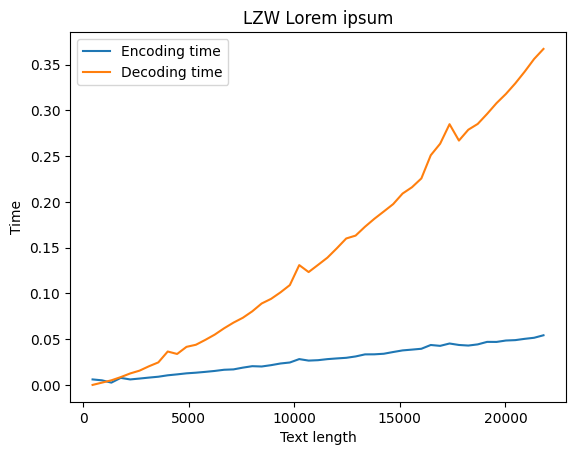

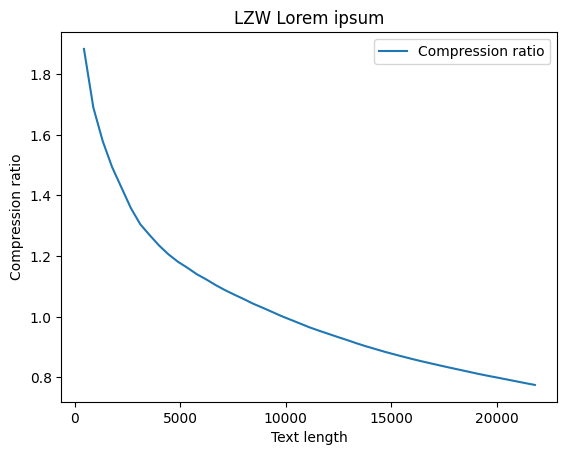

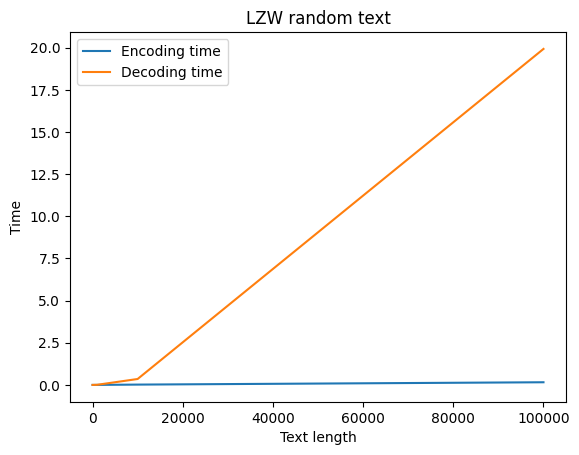

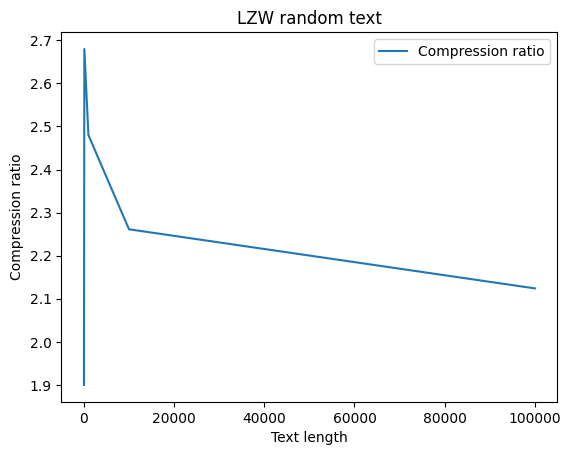

In [13]:
class LZW:
    def encode(self, text: str) -> tuple[str, list]:
        if not text:
            return '', []

        dictionary={}
        i=0

        for char in text:
            if len(dictionary)==len(set(text)):
                break
            if char not in dictionary:
                dictionary[char]=i
                i+=1
        
        result_dictionary = list(dictionary.keys())
 
        encoded_text = ''
        temp = ""

        for char in text:
            temp += char
            if temp not in dictionary:
                encoded_text+=(str(dictionary[temp[:-1]]))+' '
                dictionary[temp] = len(dictionary)
                temp = char

        encoded_text+=str(dictionary[temp])

        return encoded_text, result_dictionary

    def decode(self, code: str, coding_dict: list) -> str:
        coding_dict = {i : char for i, char in enumerate(coding_dict)}
        coding_dict_start = coding_dict.copy()

        decoded_text = ""
        temp=''
        code = list(map(int,code.split()))

        for num in code:
            if num in coding_dict:
                decoded_text += coding_dict[num]
                temp+=coding_dict[num]
                if num in coding_dict_start:
                    if temp not in coding_dict.values():
                        coding_dict[len(coding_dict)] = temp
                        temp = temp[-1]
                else:
                    temp_2=''
                    for char in temp:
                        temp_2+=char
                        if temp_2 not in coding_dict.values():
                            coding_dict[len(coding_dict)] = temp_2
                            temp_2 = temp_2[:-1]
                            break
                    temp = temp[len(temp_2):]
            else:
                temp=temp+temp[0]
                coding_dict[len(coding_dict)] = temp
                decoded_text += coding_dict[num]
        return decoded_text


if __name__ == "__main__":
    lzw = LZW()
    alphabet = "abcdefghigklmnopqrstuvwxyz., '1234567890()"

    text = "".join(alphabet[randint(0, len(alphabet) - 1)] for _ in range(1000))
    encoded_text, coding_dict = lzw.encode(text)
    assert lzw.decode(encoded_text, coding_dict) == text

    print(f'Ratio of encoded text to original text: {len(encoded_text) * 8 / (len(text) * 8)}')

    text_size = [i for i in range(1, 50)]
    encoding_time_results = []
    decoding_time_results = []
    compression_results = []
    start_text="Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."
    len_texts = []

    for size in text_size:
        text = size*start_text
        len_texts.append(len(text))
        start = time.time()
        encoded_text, coding_dict = lzw.encode(text)
        encoding_time_results.append(time.time() - start)
        start = time.time()
        decoded_text = lzw.decode(encoded_text, coding_dict)
        decoding_time_results.append(time.time() - start)
        compression_results.append(len(encoded_text) * 8 / (len(text) * 8))
    
    plt.plot(len_texts, encoding_time_results, label='Encoding time')
    plt.plot(len_texts, decoding_time_results, label='Decoding time')
    plt.xlabel('Text length')
    plt.ylabel('Time')
    plt.legend()
    plt.title('LZW Lorem ipsum')
    plt.show()
    plt.plot(len_texts, compression_results, label='Compression ratio')
    plt.xlabel('Text length')
    plt.ylabel('Compression ratio')
    plt.legend()
    plt.title('LZW Lorem ipsum')
    plt.show()

    text_size = [10**i for i in range(1, 6)]
    encoding_time_results = []
    decoding_time_results = []
    compression_results = []

    for size in text_size:
        text = "".join(alphabet[randint(0, len(alphabet) - 1)] for _ in range(size))
        start = time.time()
        encoded_text, coding_dict = lzw.encode(text)
        encoding_time_results.append(time.time() - start)
        start = time.time()
        decoded_text = lzw.decode(encoded_text, coding_dict)
        decoding_time_results.append(time.time() - start)
        compression_results.append(len(encoded_text) * 8 / (size * 8))
    
    plt.plot(text_size, encoding_time_results, label='Encoding time')
    plt.plot(text_size, decoding_time_results, label='Decoding time')
    plt.xlabel('Text length')
    plt.ylabel('Time')
    plt.legend()
    plt.title('LZW random text')
    plt.show()
    plt.plot(text_size, compression_results, label='Compression ratio')
    plt.xlabel('Text length')
    plt.ylabel('Compression ratio')
    plt.legend()
    plt.title('LZW random text')
    plt.show()


## Результат

Загалом можна побачити, що алгоритм LZW працює добре у випадках, коли у вхідному тексті є повторювання. Якщо текст складений з рандомних символів, то ступінь зжимання тексту є набагато меншою, та закодований текст є навіть більшим за початковий. При малих обсягах алгоритм робить текст ще більшим, але при збільшенні розміру тексту ступінь стиснення стає все більше і більше.

# Алгоритм LZ77

## Encode
Цей алгоритм використовує буфер, розмір буфера задається користувачем. при закодуванні елемента буфер змінюється на останні n закодованих елементів.
Ми вважаємо буфер і незакодований текст одним цілим. Ми ітеруємося по елементах буфера. Під час цих ітерацій ми відбираємо елемент з найдовшою кількістю співпадінь, та індекс з якого починаються ці співпадіння у буфері. Пошук співпадінь на конретній ітерації працює так: ми маємо індекс з якого ми починаємо порівнювати, тоді
ми дивимося, чи цей елемент та перший елемент після буфера однакові, ми умовно зміщуємо буфер і порівнюємо знову перший елемент та елемент після буфера, поки не натрапимо на співпадіння або кінець тексту. в кінці ітерації ми записуємо індекс справа на ліво в буфері, починаючи з одинички, довжину співпадіння та елемент, що неспівпав з незакодованого тексту, якщо довжина співпадіння більша за останню.
## Decode
Ми ітеруємося по тріплетах, що складаються з індекса в буфері, довжини співпадіння та елементу, що не співпав.
Тоді ми за додаємо текст з довжиною співпадіння починаючи з індексу в буфері.
Якщо довжина співпадіння більша, ніж довжина елементів у буфері після індексу ми додаємо. ми створюємо стрічку, що містить в собі енну кількість стрічок з елементів у буфері після індексу і додаємо цю стрічку до довжини співпадіння.


Ratio of encoded text to original text: 2.4693


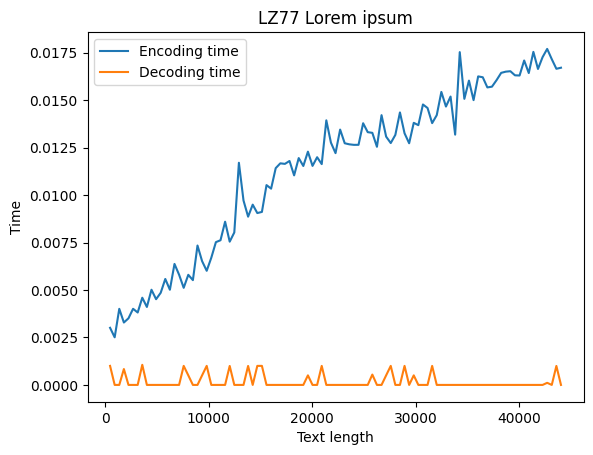

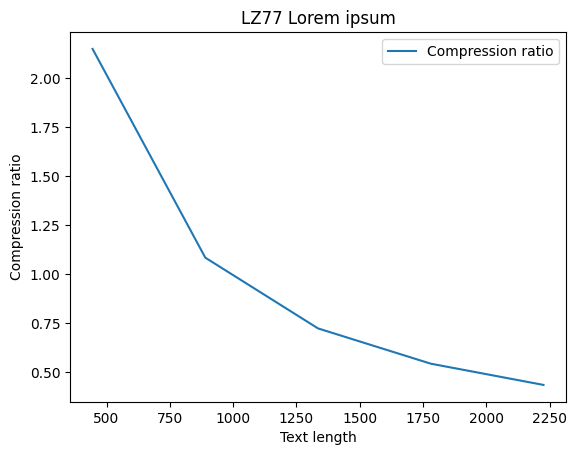

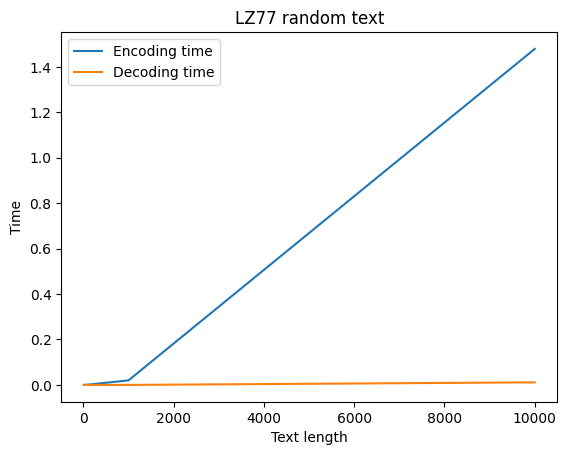

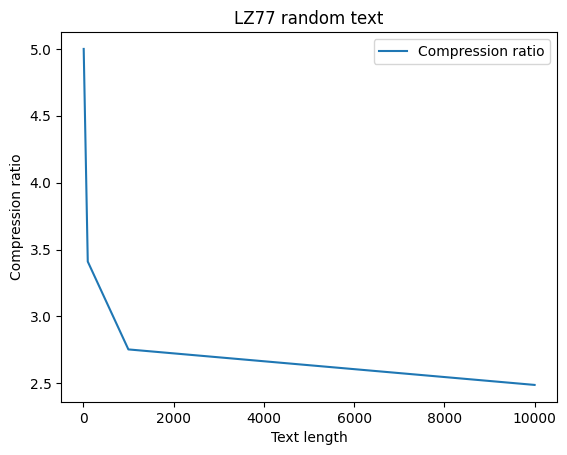

In [14]:
class LZ77:
    def __init__(self, buffer_size: int) -> None:
        self.buffer_size = buffer_size

    def encode(self, text: str) -> str:
        i = 0
        code = []
        text_len = len(text)
        while i < text_len:
            buffer_start = max(0, i - self.buffer_size)
            buffer_end = i
            code_len = 0
            last_code_len = 0
            first_i = 0
            for buffer_i in range(buffer_start, buffer_end):
                code_len = 0
                encoded_el = ""
                if text[buffer_i] == text[i]:
                    code_len += 1
                    encoded_el = text[buffer_i]
                    buffer_i2 = buffer_i + 1
                    while buffer_i2 < buffer_end + code_len:
                        if i + code_len >= text_len:
                            break
                        if text[buffer_i2] == text[i + code_len]:
                            code_len += 1
                            encoded_el += text[buffer_i2]
                        else:
                            break
                        buffer_i2 += 1
                if code_len >= last_code_len:
                    first_i = i - buffer_i if code_len else 0
                    last_code_len = code_len
            last_el = text[i + last_code_len] if i + last_code_len < text_len else ""
            code.append((first_i,last_code_len,last_el))
            i += last_code_len + 1
        return self._list2text(code)

    @staticmethod
    def _text2list(text: str) -> list[tuple]:
        code = []
        while text:
            text = text.split(",", 2)
            code.append((int(text[0]), int(text[1]), text[2][0] if text[2] else ""))
            text = text[2][1:] if text[2] else ""
        return code

    @staticmethod
    def _list2text(lst: list[tuple]) -> str:
        return "".join(map(lambda el: f"{el[0]},{el[1]},{el[2]}", lst))

    def decode(self, text: str) -> str:
        i = 0
        code = self._text2list(text)
        decoded_text = ""
        for buffer_i, code_len, last_el in code:
            if code_len - buffer_i > 0:
                encoded_part = decoded_text[i - buffer_i: i] * (code_len // buffer_i + 1)
                decoded_text += encoded_part[:code_len] + last_el
            else:
                decoded_text += decoded_text[i - buffer_i: i - buffer_i + code_len] + last_el
            i += code_len + 1
        return decoded_text


if __name__ == "__main__":
    alphabet = "abcdefghigklmnopqrstuvwxyz., '1234567890()"

    text = "".join(alphabet[randint(0, len(alphabet) - 1)] for _ in range(10000))
    buffer_size = len(text)
    lz77 = LZ77(buffer_size)
    encoded_text = lz77.encode(text)
    assert lz77.decode(encoded_text) == text

    print(f'Ratio of encoded text to original text: {(len(encoded_text) * 8) / (len(text) * 8)}')

    text_size = [i for i in range(1, 100)]
    encoding_time_results = []
    decoding_time_results = []
    compression_results = []
    start_text="Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."
    len_texts = []

    for size in text_size:
        text = size*start_text
        lz77.buffer_size *= size
        len_texts.append(len(text))
        start = time.time()
        encoded_text = lz77.encode(text)
        encoding_time_results.append(time.time() - start)
        start = time.time()
        decoded_text = lz77.decode(encoded_text)
        decoding_time_results.append(time.time() - start)
        compression_results.append((len(encoded_text) * 8) / (len(text) * 8))

    plt.plot(len_texts, encoding_time_results, label='Encoding time')
    plt.plot(len_texts, decoding_time_results, label='Decoding time')
    plt.xlabel('Text length')
    plt.ylabel('Time')
    plt.legend()
    plt.title('LZ77 Lorem ipsum')
    plt.show()
    plt.plot(len_texts[:5], compression_results[:5], label='Compression ratio')
    plt.xlabel('Text length')
    plt.ylabel('Compression ratio')
    plt.legend()
    plt.title('LZ77 Lorem ipsum')
    plt.show()

    text_size = [10**i for i in range(1, 5)]
    encoding_time_results = []
    decoding_time_results = []
    compression_results = []

    for size in text_size:
        text = "".join(alphabet[randint(0, len(alphabet) - 1)] for _ in range(size))
        lz77.buffer_size = size
        start = time.time()
        encoded_text = lz77.encode(text)
        encoding_time_results.append(time.time() - start)
        start = time.time()
        decoded_text = lz77.decode(encoded_text)
        decoding_time_results.append(time.time() - start)
        compression_results.append((len(encoded_text) * 8) / (size * 8))
    
    plt.plot(text_size, encoding_time_results, label='Encoding time')
    plt.plot(text_size, decoding_time_results, label='Decoding time')
    plt.xlabel('Text length')
    plt.ylabel('Time')
    plt.legend()
    plt.title('LZ77 random text')
    plt.show()
    plt.plot(text_size, compression_results, label='Compression ratio')
    plt.xlabel('Text length')
    plt.ylabel('Compression ratio')
    plt.legend()
    plt.title('LZ77 random text')
    plt.show()

## Результат
Можна побачити, що цей алгоритм є максимально ефективним, коли текст повторюється. Якість стиснення збільшується, якщо є багато одинакових шматків тексту.
Також видно, що він працює швидше ніж lzw, тому що він швидко розпізнає повторення і ефективно закодовує його.

# Алгоритм Deflate

## Encode
закодовуємо за lz77, і це закодоване повідомлення закодовуємо за huffman
## Decode
розкодовуємо за huffman, і це розкодоване повідомлення розкодовуємо за lz77

Ratio of encoded text to original text: 1.1501375


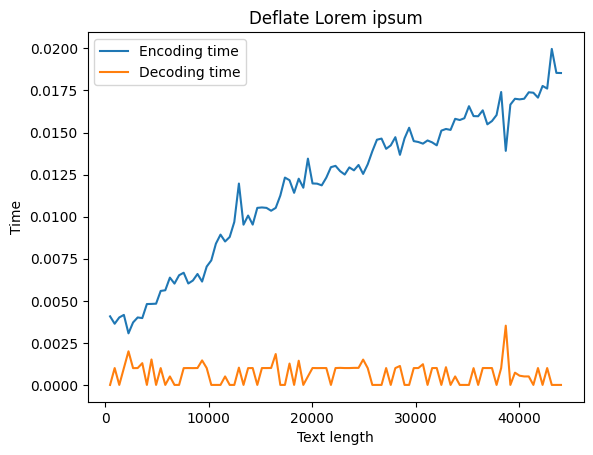

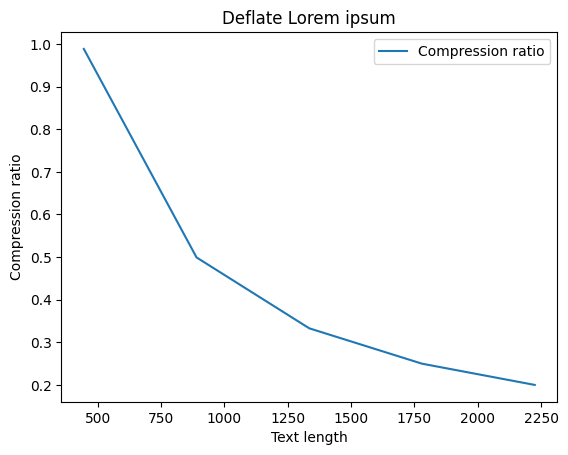

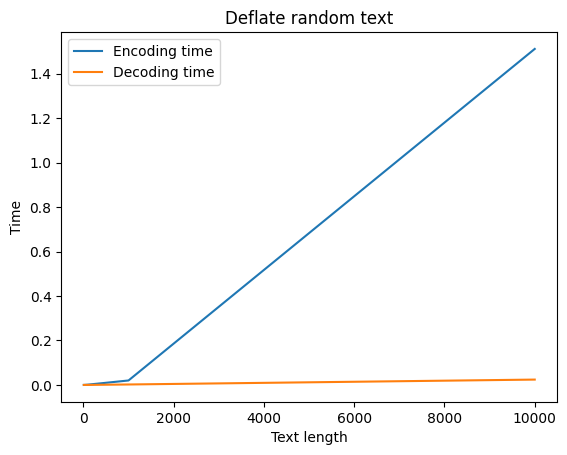

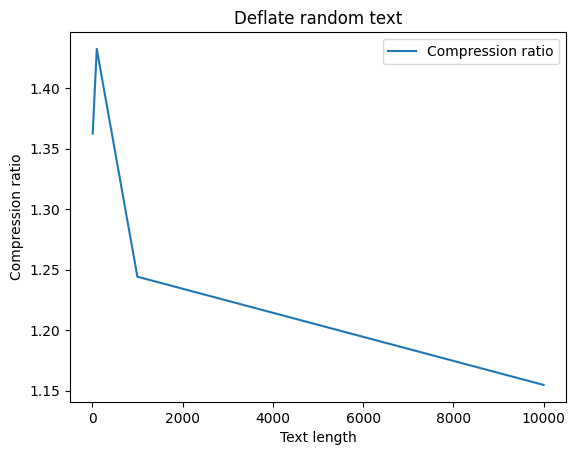

In [18]:
class Deflate:
    def __init__(self, buffer_size: int):
        self.buffer_size = buffer_size

    def encode(self, text: str) -> str:
        lz77_encoded = LZ77(self.buffer_size).encode(text)
        lz77_huffman_encoded, coding_dict = Huffman().encode(lz77_encoded)
        return lz77_huffman_encoded, coding_dict

    def decode(self, code: str, coding_dict: dict[str, str]) -> str:
        huffman_decoded = Huffman().decode(code, coding_dict)
        huffman_lz77_decoded = LZ77(self.buffer_size).decode(huffman_decoded)
        return huffman_lz77_decoded


if __name__ == "__main__":
    alphabet = "abcdefghigklmnopqrstuvwxyz., '1234567890()"

    text = "".join(alphabet[randint(0, len(alphabet) - 1)] for _ in range(10000))
    buffer_size = len(text)
    deflate = Deflate(buffer_size)
    encoded_text, coding_dict = deflate.encode(text)
    assert deflate.decode(encoded_text, coding_dict) == text

    print(f'Ratio of encoded text to original text: {len(encoded_text) / (len(text) * 8)}')

    text_size = [i for i in range(1, 100)]
    encoding_time_results = []
    decoding_time_results = []
    compression_results = []
    start_text="Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."
    deflate.buffer_size = len(start_text)
    len_texts = []

    for size in text_size:
        text = size*start_text
        deflate.buffer_size = size * len(start_text)
        len_texts.append(len(text))
        start = time.time()
        encoded_text, coding_dict = deflate.encode(text)
        encoding_time_results.append(time.time() - start)
        start = time.time()
        decoded_text = deflate.decode(encoded_text, coding_dict)
        decoding_time_results.append(time.time() - start)
        compression_results.append(len(encoded_text) / (len(text) * 8))
    
    plt.plot(len_texts, encoding_time_results, label='Encoding time')
    plt.plot(len_texts, decoding_time_results, label='Decoding time')
    plt.xlabel('Text length')
    plt.ylabel('Time')
    plt.legend()
    plt.title('Deflate Lorem ipsum')
    plt.show()
    plt.plot(len_texts[:5], compression_results[:5], label='Compression ratio')
    plt.xlabel('Text length')
    plt.ylabel('Compression ratio')
    plt.legend()
    plt.title('Deflate Lorem ipsum')
    plt.show()

    text_size = [10**i for i in range(1, 5)]
    encoding_time_results = []
    decoding_time_results = []
    compression_results = []

    for size in text_size:
        text = "".join(alphabet[randint(0, len(alphabet) - 1)] for _ in range(size))
        deflate.buffer_size = size
        start = time.time()
        encoded_text, coding_dict = deflate.encode(text)
        encoding_time_results.append(time.time() - start)
        start = time.time()
        decoded_text = deflate.decode(encoded_text, coding_dict)
        decoding_time_results.append(time.time() - start)
        compression_results.append(len(encoded_text) / (size * 8))
    
    plt.plot(text_size, encoding_time_results, label='Encoding time')
    plt.plot(text_size, decoding_time_results, label='Decoding time')
    plt.xlabel('Text length')
    plt.ylabel('Time')
    plt.legend()
    plt.title('Deflate random text')
    plt.show()
    plt.plot(text_size, compression_results, label='Compression ratio')
    plt.xlabel('Text length')
    plt.ylabel('Compression ratio')
    plt.legend()
    plt.title('Deflate random text')
    plt.show()

## Результат
Ми можемо бачити, що deflate має переваги та недоліки lz77, та він є приблизно в два рази швидший, як на рандомному тексті, так і на повторюваному

# Порівняння чотирьох алгоритмів

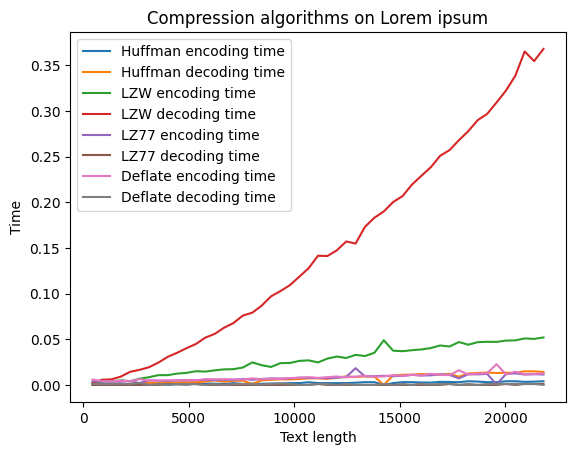

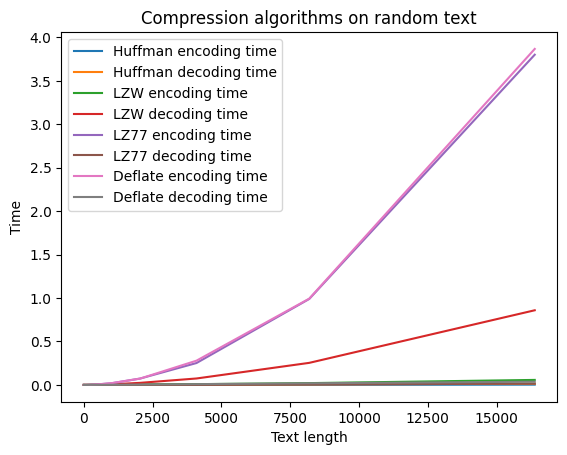

In [29]:
huffman = Huffman()
lzw = LZW()
lz77 = LZ77(None)
deflate = Deflate(None)

alphabet = "abcdefghigklmnopqrstuvwxyz., '1234567890()"
lorem_ipsum = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."

text_size = [i for i in range(1, 50)]
huffman_encoding_time_results = []
huffman_decoding_time_results = []
lzw_encoding_time_results = []
lzw_decoding_time_results = []
lz77_encoding_time_results = []
lz77_decoding_time_results = []
deflate_encoding_time_results = []
deflate_decoding_time_results = []

for size in text_size:
    text = size * lorem_ipsum
    start = time.time()
    encoded_text, coding_dict = huffman.encode(text)
    huffman_encoding_time_results.append(time.time() - start)
    start = time.time()
    decoded_text = huffman.decode(encoded_text, coding_dict)
    huffman_decoding_time_results.append(time.time() - start)
    start = time.time()
    encoded_text, coding_dict = lzw.encode(text)
    lzw_encoding_time_results.append(time.time() - start)
    start = time.time()
    decoded_text = lzw.decode(encoded_text, coding_dict)
    lzw_decoding_time_results.append(time.time() - start)
    lz77.buffer_size = len(text)
    start = time.time()
    encoded_text = lz77.encode(text)
    lz77_encoding_time_results.append(time.time() - start)
    start = time.time()
    decoded_text = lz77.decode(encoded_text)
    lz77_decoding_time_results.append(time.time() - start)
    deflate.buffer_size = len(text)
    start = time.time()
    encoded_text, coding_dict = deflate.encode(text)
    deflate_encoding_time_results.append(time.time() - start)
    start = time.time()
    decoded_text = deflate.decode(encoded_text, coding_dict)
    deflate_decoding_time_results.append(time.time() - start)

text_size = list(map(len, [i * lorem_ipsum for i in text_size]))
plt.plot(text_size, huffman_encoding_time_results, label='Huffman encoding time')
plt.plot(text_size, huffman_decoding_time_results, label='Huffman decoding time')
plt.plot(text_size, lzw_encoding_time_results, label='LZW encoding time')
plt.plot(text_size, lzw_decoding_time_results, label='LZW decoding time')
plt.plot(text_size, lz77_encoding_time_results, label='LZ77 encoding time')
plt.plot(text_size, lz77_decoding_time_results, label='LZ77 decoding time')
plt.plot(text_size, deflate_encoding_time_results, label='Deflate encoding time')
plt.plot(text_size, deflate_decoding_time_results, label='Deflate decoding time')
plt.xlabel('Text length')
plt.ylabel('Time')
plt.legend()
plt.title('Compression algorithms on Lorem ipsum')
plt.show()

text_size = [2**i for i in range(1, 15)]
huffman_encoding_time_results = []
huffman_decoding_time_results = []
lzw_encoding_time_results = []
lzw_decoding_time_results = []
lz77_encoding_time_results = []
lz77_decoding_time_results = []
deflate_encoding_time_results = []
deflate_decoding_time_results = []

for size in text_size:
    text = "".join(alphabet[randint(0, len(alphabet) - 1)] for _ in range(size))
    start = time.time()
    encoded_text, coding_dict = huffman.encode(text)
    huffman_encoding_time_results.append(time.time() - start)
    start = time.time()
    decoded_text = huffman.decode(encoded_text, coding_dict)
    huffman_decoding_time_results.append(time.time() - start)
    start = time.time()
    encoded_text, coding_dict = lzw.encode(text)
    lzw_encoding_time_results.append(time.time() - start)
    start = time.time()
    decoded_text = lzw.decode(encoded_text, coding_dict)
    lzw_decoding_time_results.append(time.time() - start)
    lz77.buffer_size = size
    start = time.time()
    encoded_text = lz77.encode(text)
    lz77_encoding_time_results.append(time.time() - start)
    start = time.time()
    decoded_text = lz77.decode(encoded_text)
    lz77_decoding_time_results.append(time.time() - start)
    deflate.buffer_size = size
    start = time.time()
    encoded_text, coding_dict = deflate.encode(text)
    deflate_encoding_time_results.append(time.time() - start)
    start = time.time()
    decoded_text = deflate.decode(encoded_text, coding_dict)
    deflate_decoding_time_results.append(time.time() - start)

plt.plot(text_size, huffman_encoding_time_results, label='Huffman encoding time')
plt.plot(text_size, huffman_decoding_time_results, label='Huffman decoding time')
plt.plot(text_size, lzw_encoding_time_results, label='LZW encoding time')
plt.plot(text_size, lzw_decoding_time_results, label='LZW decoding time')
plt.plot(text_size, lz77_encoding_time_results, label='LZ77 encoding time')
plt.plot(text_size, lz77_decoding_time_results, label='LZ77 decoding time')
plt.plot(text_size, deflate_encoding_time_results, label='Deflate encoding time')
plt.plot(text_size, deflate_decoding_time_results, label='Deflate decoding time')
plt.xlabel('Text length')
plt.ylabel('Time')
plt.legend()
plt.title('Compression algorithms on random text')
plt.show()


